# HR Data from a consulting firm 

explanatory data analyis

Tasks

- import necessary visualization packages
- load the HR data as a DataFrame
- delete the non nessesary columns(with concat() and del) 
- inspect the HR data (head, and info, describe) 
- replace the NaN values in a meaningful way (e.g. null, mean, median) 
- make a histogram 
- scatter plot with multiple variables 
- scatter plot for 2 variables
- violin plot 
- add a linear regession to scatter plot 
- add a heatmap to show all correlations
- give the OLS summary (some and all Xns) 
- box plot for the same variables 
- make a graph with multiple 
- make stacked bar graph (with gender hue) 
- safe the charts 

In [2]:
"""
the read block in the bottom tells you that we have not used the 
imported packages, yet: no worries we will
"""


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style("darkgrid")
#get the data and give it a good name 

hr_df = pd.read_csv ("03_HR_Employee_Attrition_Data (1).csv")
hr_df.head() #good to get a first "feel about the data, shows by default the first 5 lines"

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
"""
first of all we have to twirk around a bit with the options we are seing 

this is important when we will later obsere our cleaned data 
"""

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
#demonstrating the concatenate function (and by the way the slicing options)

"""
just a note to concatenate: concatenate is a realy useful function but if 
    you use a very(not like ours) large dataset you might get some perfomance issues 
    as the functions just copies all underlying dataset 
    so it might be worth having a look into comprehension as well (we cover that the next time)


As we have obsered that we have some variables that are of no use 
we delete them from our DataFrame
they are: count, number, standardHours

NOTE: the last part of the list ist still being included! this is other 
than what Python does normaly 

you might wonder why we have such a hard time and making all thouse different list 
    but, unfortutately, you can not .loc a list-like label string anymore...
    
    
shortly: why do we bother?? because we are intersted in what realy drives the attriton
    and without any statistical analysis we can say that a value that is same for 
    ever employee does not change a thing
    (arguably, the employee ID could actually have a effect on the attrtion
    as it could indicate the lenght of the employee being in the company, 
    but, as we aready established above, the years in the company are given 
    seperately and we don´t know if the ID has just been given randomly)
"""


hr_df_firstpart = hr_df.loc[:, ["Age", "Attrition", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField"]]
#the second line was just there for me to check if the slicing has worked properly 
hr_df_firstpart

hr_df_secondpart = hr_df.loc[: , ["RelationshipSatisfaction"]]
hr_df_secondpart

hr_df_thirdpart = hr_df.loc [: , ["StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]]
hr_df_thirdpart


"""
Now the fun starts and we bring everything together again 
    (in Python language: concatenate)
    with the funciton pd.concat()
    
    note: first takes all the DataFrames and 
    than you have to pass on the axis (by default = 0 (== rows))
    you don´t want to sort anything so you are good advised to change the default 
        of sort to False 
"""



sns.set_style("whitegrid")
new_df = pd.concat ([hr_df_firstpart, hr_df_secondpart, hr_df_thirdpart], axis = 1, sort = False)
new_df.head()


#I show you an even simpler and more comon version althoug the concatenate is very useful 
#if you get two datasets and want to bring them together

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  RelationshipSatisfaction  \
0                 1          2  Life Sciences                         1   
1                 8          1  Life Sciences                         4   
2                 2          2          Other                         2   
3                 3          4  Life Sciences                         3   
4                 2          1        Medical                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [5]:
"""
I have shown you how to delete something manually. 
But, of course, Python offers a very easy solution for the issue we just discusses 
namely: the funciton 
    
    del df_name ["column_name"]
    
    "EmployeeNumber", "StandardHours
    
    
    note: if you start form a point after the line one, you get an error running this line 
    the reason for that is that you can not delete something twice! 
    
    
"""

#unfortunately, I have to show it to you in that way, as you can not 
#delete something that twice! (the hr_df.head() is only to check what I still have to delete)


del hr_df ["EmployeeCount"]
hr_df.head()




#for the other variables I show a nother version 
#note: the axis has to be passed on again 

#again: sorry but I can run it twice so with "#" that you see what I have done

hr_df = hr_df.drop ("EmployeeNumber", axis = 1)
hr_df.head()


#now if you don´t want to reasign the DataFrame, set inplace = True

hr_df.drop("StandardHours", axis = 1, inplace = True)

hr_df.head()



"""
so now we can run our first analysis, we are going to use several packages
(that we have already installed) to do so 

"""

'\nso now we can run our first analysis, we are going to use several packages\n(that we have already installed) to do so \n\n'

In [6]:
#to inspect the data (especially important to see if there are 
#null values that have to be replaced)
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [7]:
#general idea about the dataset 
#(note: no parantheses are being needed as 
#this value is being precaluclated and fixed)
hr_df.shape


(1470, 32)

In [8]:
"""statistics about the data 
note: only done for int64 values not for objects 
the rounding makes it more readable 
obviously some are not really insidefull, for instance: 
    employeeNumber or employee count or standard hours,

"""

round (hr_df.describe(),0)

Age  DailyRate  DistanceFromHome  Education  \
count  1470.0     1470.0            1470.0     1470.0   
mean     37.0      802.0               9.0        3.0   
std       9.0      404.0               8.0        1.0   
min      18.0      102.0               1.0        1.0   
25%      30.0      465.0               2.0        2.0   
50%      36.0      802.0               7.0        3.0   
75%      43.0     1157.0              14.0        4.0   
max      60.0     1499.0              29.0        5.0   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
count                   1470.0      1470.0          1470.0    1470.0   
mean                       3.0        66.0             3.0       2.0   
std                        1.0        20.0             1.0       1.0   
min                        1.0        30.0             1.0       1.0   
25%                        2.0        48.0             2.0       1.0   
50%                        3.0        66.0             3.0       2.0   
75%                        4.0        84.0             3.0       3.0   
max                        4.0       100.0             4.0       5.0   

       JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
count           1470.0         1470.0       1470.0              1470.0   
mean               3.0         6503.0      14313.0                 3.0   
std                1.0         4708.0       7118.0                 2.0   
min                1.0         1009.0       2094.0                 0.0   
25%                2.0         2911.0       8047.0                 1.0   
50%                3.0         4919.0      14236.0                 2.0   
75%                4.0         8379.0      20462.0                 4.0   
max                4.0        19999.0      26999.0                 9.0   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count             1470.0             1470.0                    1470.0   
mean                15.0                3.0                       3.0   
std                  4.0                0.0                       1.0   
min                 11.0                3.0                       1.0   
25%                 12.0                3.0                       2.0   
50%                 14.0                3.0                       3.0   
75%                 18.0                3.0                       4.0   
max                 25.0                4.0                       4.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count            1470.0             1470.0                 1470.0   
mean                1.0               11.0                    3.0   
std                 1.0                8.0                    1.0   
min                 0.0                0.0                    0.0   
25%                 0.0                6.0                    2.0   
50%                 1.0               10.0                    3.0   
75%                 1.0               15.0                    3.0   
max                 3.0               40.0                    6.0   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count           1470.0          1470.0              1470.0   
mean               3.0             7.0                 4.0   
std                1.0             6.0                 4.0   
min                1.0             0.0                 0.0   
25%                2.0             3.0                 2.0   
50%                3.0             5.0                 3.0   
75%                3.0             9.0                 7.0   
max                4.0            40.0                18.0   

       YearsSinceLastPromotion  YearsWithCurrManager  
count                   1470.0                1470.0  
mean                       2.0                   4.0  
std                        3.0                   4.0  
min                        0.0                   0.0  
25%                        0.0                   2.0  
50%        

DUMMY Variables 

all really well but what happend to the variable we are most interested in ??? 
the attriton ? and what is with the gender, educationfied, department,... thouse are categorial variables and we have to convert them to float/int to  get them into the statistic again



- just nice to know: why are we doing all the convertion? because we are speaking with an computer that does not know what "Sales" means, but can handle numberical data very efficent and without errors 

with get_dummies ()
pandas does assign each value to ether true or false 

if there are more than two types (e.g. Department than there will generate new variables)

In [9]:
"""
so we are looking for all objects and convert them into so called dummies 

for instance: gender: 1= female, and 0= male 
"""

dummy_gender = pd.get_dummies(hr_df ["Gender"])
dummy_gender.head()

Female  Male
0       1     0
1       0     1
2       0     1
3       1     0
4       0     1

In [10]:
#no we replace the old variable with the dummies!

#note you only need one of the dummies as they are pefectly negativly correlated 

#again writne like that, because we already changed it before! 

#  hr_df ["Gender"] = dummy_gender ["Female"]
#  hr_df.info()

In [11]:
hr_df["Gender"].head()

0    Female
1      Male
2      Male
3    Female
4      Male
Name: Gender, dtype: object

Label Encoding (for dummy generation) 

In [12]:
""" lets first inspect the object types
the unit8 means: we have changed the datatype sucessfully and the 
type is no a positive whole number between 0-255

"""

hr_df.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [13]:
hr_df.head()


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Y      Yes                 11                  3   
1                   1      Y       No                 23                  4   
2                   6      Y      Yes                 15                  3   
3                   1      Y      Yes                 11                  3   
4                   9      Y       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [14]:
hr_dummy = pd.get_dummies(hr_df, columns=["Attrition", "JobRole", "Gender", "BusinessTravel", "Department", "EducationField","MaritalStatus","Over18", "OverTime"])
hr_dummy.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0          94               3         2                4           5993   
1          61               2         2                2           5130   
2          92               2         1                3           2090   
3          56               3         1                3           2909   
4          40               3         1                2           3468   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0        19479                   8                 11                  3   
1        24907                   1                 23                  4   
2         2396                   6                 15                  3   
3        23159                   1                 11                  3   
4        16632                   9                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition_No  Attrition_Yes  \
0                        0                     5             0              1   
1                        1                     7             1              0   
2                        0                     0             0              1   
3                        3                     0             1              0   
4                        2                     2             1              0   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                  0                        0   
1                                  0                        0   
2                                  0                        0   
3                                  0                        0   
4                                  0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                     

In [15]:
#note again: dtypes does not need any brakets as it is precalculated 

#because we have pd.set_option.display.max_columns we see everthing here 
hr_dummy.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
Attrition_N

let´s see if it worked 

In [16]:


hr_dummy["Attrition_No"].head()

0    0
1    1
2    0
3    1
4    1
Name: Attrition_No, dtype: uint8

In [17]:
hr_dummy

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
5      32       1005                 2          2                        4   
6      59       1324                 3          3                        3   
7      30       1358                24          1                        4   
8      38        216                23          3                        4   
9      36       1299                27          3                        3   
10     35        809                16          3                        1   
11     29        153                15          2                        4   
12     31        670                26          1                        1   
13     34       1346                19          2                        2   
14     28        103                24          3                        3   
15     29       1389                21          4                        2   
16     32        334                 5          2                        1   
17     22       1123                16          2                        4   
18     53       1219                 2          4                        1   
19     38        371                 2          3                        4   
20     24        673                11          2                        1   
21     36       1218                 9          4                        3   
22     34        419                 7          4                        1   
23     21        391                15          2                        3   
24     34        699                 6          1                        2   
25     53       1282                 5          3                        3   
26     32       1125                16          1                        2   
27     42        691                 8          4                        3   
28     44        477                 7          4                        1   
29     46        705                 2          4                        2   
30     33        924                 2          3                        3   
31     44       1459                10          4                        4   
32     30        125                 9          2                        4   
33     39        895                 5          3                        4   
34     24        813                 1          3                        2   
35     43       1273                 2          2                        4   
36     50        869                 3          2                        1   
37     35        890                 2          3                        4   
38     36        852                 5          4                        2   
39     33       1141                 1          3                        3   
40     35        464                 4          2                        3   
41     27       1240                 2          4                        4   
42     26       1357                25          3                        1   
43     27        994                 8          3                        4   
44     30        721                 1          2                        3   
45     41       1360                12          3                        2   
46     34       1065                23          4                        2   
47     37        408                19          2                        2   
48     46       1211                 5          4                        1   
49     35       1229                 8          1                        4   
50     48        626        

In [18]:
hr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

"""yes, indeed, it worked all data is now a int (ether: 64 or 8)
and obviously we have more variables as we had to split them up! 
"""

We are now sorting the DataFrame to have the variable we are most interested in in the beginnging (attrition)

- we do that by pop () and insert()


In [19]:
"""remove the variable of interst 
from the data and safe it in a new dataFrame

"""

col_of_interest = "Attrition_No"
first_col= hr_dummy.pop (col_of_interest)
first_col

0       0
1       1
2       0
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      0
15      1
16      1
17      1
18      1
19      1
20      1
21      0
22      1
23      1
24      0
25      1
26      0
27      1
28      1
29      1
30      1
31      1
32      1
33      0
34      0
35      1
36      0
37      1
38      1
39      1
40      1
41      1
42      0
43      1
44      1
45      0
46      1
47      1
48      1
49      1
50      0
51      0
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      0
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      0
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


In [20]:
"""
now we nsert the variable (on the first possition)

and we have a look if it worked! 
"""
#we have to write it like that because otherwise we get an error (that the attribute already exist) by running it aother time 
hr_dummy.insert(0, col_of_interest, first_col)
hr_dummy.head()
hr_dummy.shape

(1470, 54)

## DELETE of unessesary attributes!

In [21]:
hr_dummy.shape

(1470, 54)

In [22]:
#lets have a look again at what we have 
hr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition_No                       1470 non-null   uint8
 1   Age                                1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

In [23]:
"""
note: you have to specify the axis to 1 because we are intrested 
in deleting only colums and no values

we don´t need employee count and employee number as they are neutral values 
    that are either the same for all employees or randomly distributed 

"""

#   hr_dummy = hr_dummy.drop (["EmployeeCount", "EmployeeNumber", "Attrition_Yes", "Gender_1", "OverTime_Yes"], axis = 1)

hr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition_No                       1470 non-null   uint8
 1   Age                                1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

 to we assign the original name to the dummy DataFrame again

# Replace NaN (Not a Number) values 

it is not necessary to replace any null values here (because there are no NaN (Not a Number), we are still doing it for completion! 
mean and median are very close togheter in this data set, which basically tells us that the that the data is normally distributed and not right or left skewed -->> we can use both values to replace the data 

In [24]:
"""

we could (we dont do that) drop the NaN with the funktion dropna()
we replace the null values with the function pandas.FataFrame.fillna()

values: what we are speaking about 

#to constantly change the data frame: you have to pass it on by writing an equasio 
"""

hr_df= hr_df.fillna(hr_df.mean())





## SEABORN LIBARY 

AxesSubplot(0.125,0.125;0.775x0.755)


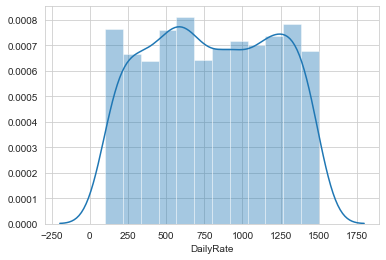

In [25]:
#histogram for daily rate with seaborn as sns 

#shows histogram and KDE for univariate distribution in one step

print(sns.distplot(hr_df["DailyRate"]))

plt.show()


Barplot 

compares two things with one another

here: age and daily rate (the first one is always the x the later one the variable on the y axis


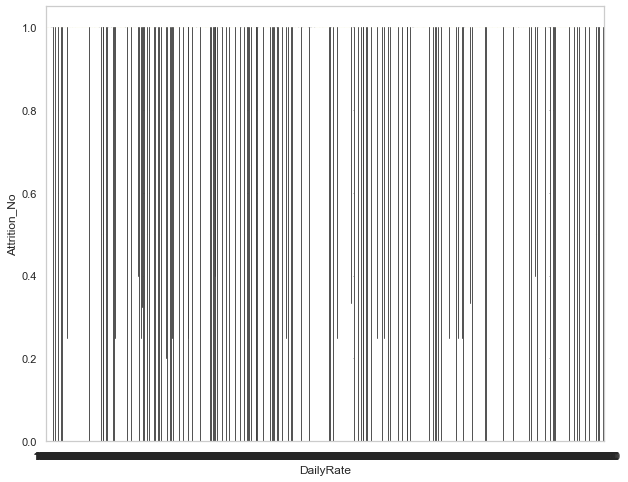

In [246]:
"""
interpretation: 
from a first glance, it does not look like there is a great deal of a relationshiop between the two variables 
so let uslook at the single variables first and than we try to find something (hint: it starts
with head and ends with map and OLS) that gives as a comprehensive picture 

"""

sns.set_context("notebook", rc = {"lines.linewidth": 0.5})


figure = sns.barplot(hr_dummy["DailyRate"], hr_dummy ["Attrition_No"], color = "yellow")
figure.figure.set_size_inches(10,8)
plt.savefig("DailyRate_and_Attrition.png")
plt.show()




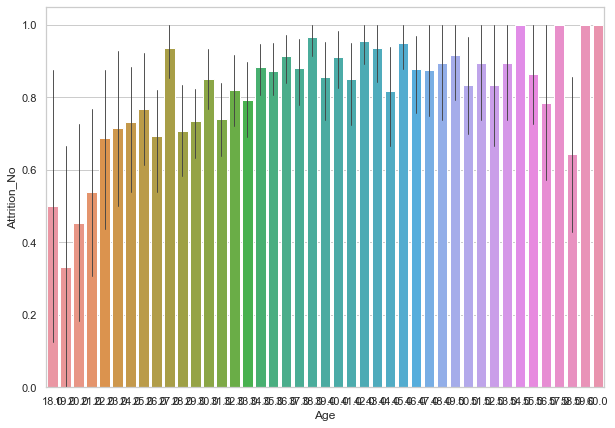

In [248]:
"""we are glancing at another pair of variables 
probably a more sutable pairas we work with categorial variables 

so we see one thing: 

the age is slighly (only very slighlty) different amoungst the deparments


"""




figure = sns.barplot(hr_dummy["Age"], hr_dummy ["Attrition_No"])
figure.figure.set_size_inches (10,7)
plt.savefig("Age_Attrition.png")
plt.show()


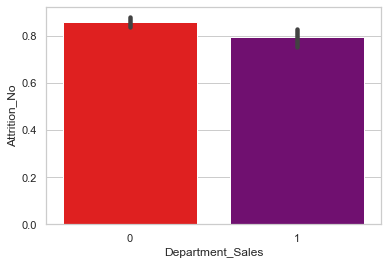

In [28]:

#we change the colors to have a bit of variety in it 

#hear we are using the dataFrame before we have assigned the dummy variables

sns.barplot(hr_dummy["Department_Sales"], hr_dummy ["Attrition_No"], palette = ["red", "purple", "pink"])
plt.show()


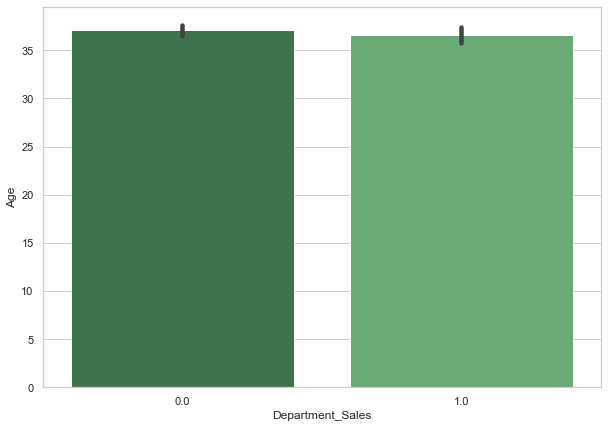

In [204]:
#we change the colors to have a bit of variety in it 

#here we have a color that is shaded of the categories 

figure = sns.barplot(hr_dummy["Department_Sales"], hr_dummy ["Age"], palette = "Greens_d")
figure.figure.set_size_inches (10,7)
plt.show()


For more color paletts in seaborn: 

https://seaborn.pydata.org/tutorial/color_palettes.html

note on the side, if you ever restart Kernal because you experience issues with the runtime, 
you have to start everything again 

and you can not just run the code in a random line! 

The reason for that is simply, that you otherwise, have no access to the imported libaries 
AND: to the variables, DataFrames and values you have already assigned 

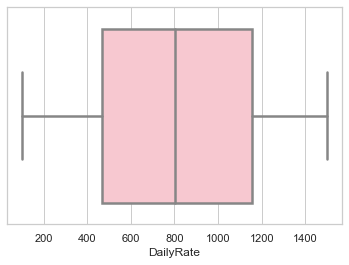

In [30]:
figure = sns.boxplot(hr_df["DailyRate"], color = "pink") 
figure.figure.set_size_inches (10,7)

plt.show()

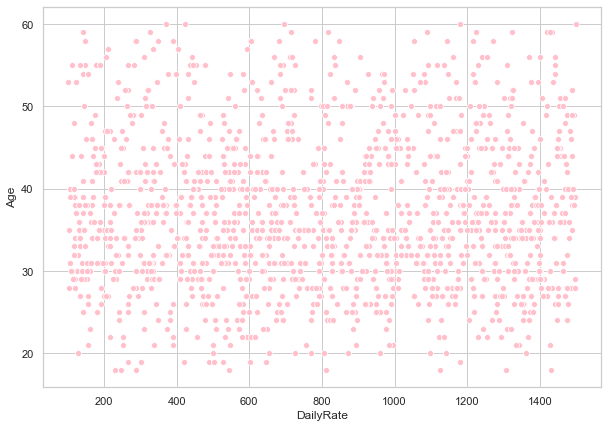

In [205]:
#scatter plot of daily rate and age 

figure = sns.scatterplot(hr_df["DailyRate"], hr_df["Age"], color = "pink")
figure.figure.set_size_inches (10,7)
#interpretation: seamingly no realationship 


plt.show()

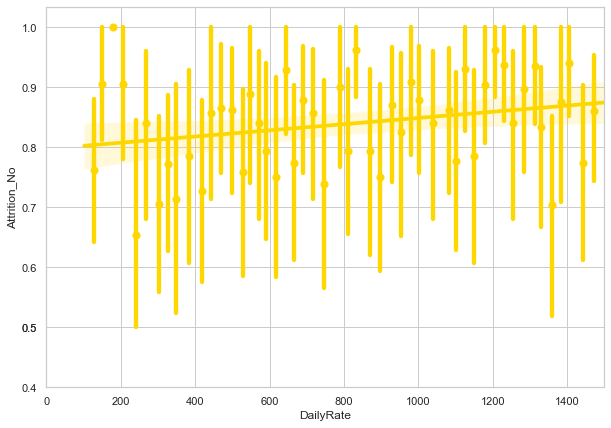

In [206]:
"""adding a regession to the data

regplot is very flexible (accepts different data types, )

x_bins: makes it more readable and basically puts all data into 
50 discrete bins, symontaniously it shows the confidence internal, the regression is still theorginal data"""  


figure = sns.regplot(hr_dummy["DailyRate"], hr_dummy["Attrition_No"], x_bins = 50, color= "gold")

figure.figure.set_size_inches (10,7)
#persumably we dont knot the highest value we can insert a max () funcktin
plt.yticks ([0.4, 0.5, 0.5,0.6,0.7,0.8,0.9, max(hr_dummy["Attrition_No"]) ])

#though out I will demonstrate different possibilies to set the axis 
# >> this is by far my prefered option to set the ticks 
plt.xticks(np.arange (0,1600, step = 200))
#interpretation: almost no relationship and if very low (but positive) 

plt.show()

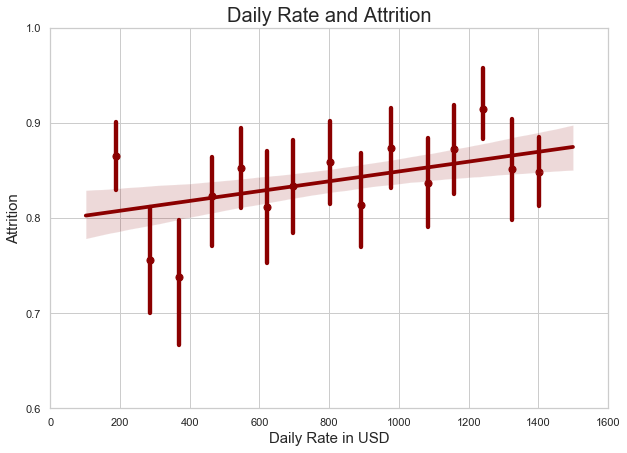

In [207]:
#what we see is a slight positiive correlation 
#we are showing the data with less bins 
#NOTE: the regression is made with the Unbinnded data 
plt.title ("Daily Rate and Attrition", fontsize= 20)

figure = sns.regplot(hr_dummy["DailyRate"], hr_dummy["Attrition_No"], x_estimator=np.mean, x_bins = 15, color = "darkred", ci = 80)
figure.figure.set_size_inches (10,7)
plt.xlabel("Daily Rate in USD", fontsize = 15)
plt.ylabel("Attrition", fontsize = 15)
plt.yticks ([0.6,0.7,0.8,0.9,1])
plt.xticks([0, 200,400,600,800,1000,1200,1400,1600])
plt.show()

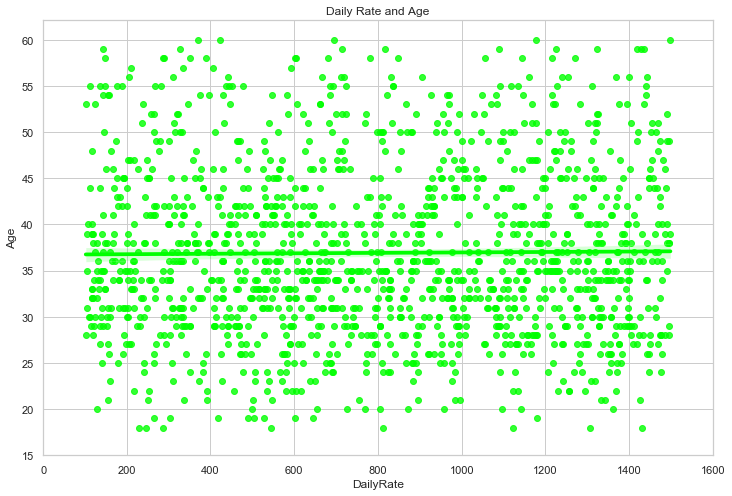

In [208]:
"""just to demonstrate what happens if we are not binning at all: 
 -->> we can basically only observe that the data seams not have no influence with one another (no correlation)
 
 ci = confidence interval between 0 and 100
 
 color, can be choosen from all colors in python 
     for the color code, just google: color code python and you get a list 
    if you want to have a quick solution: you can basically use 
    all comon colors with dark or light before them and get a lot of nice colors 
    
    note: all liberies have a slightly different color code, but you can always include 
    the package in your google search :)
 """
plt.figure(figsize = (10,7))
plt.title ("Daily Rate and Age")

x= hr_df["DailyRate"]

y= hr_df["Age"]
regressions_graph=sns.regplot(x,y, color = "lime", ci= 90)
plt.yticks(np.arange(15, 65, step = 5))
plt.xticks(np.arange(0,1700,step=200))
regressions_graph.figure.set_size_inches (12,8)
plt.show()

In [209]:
#get insides to the regession line 


#confidence interval by default 95%

import statsmodels.api as sm 



#x = setting an intersept (with the smallest number of rooms)
X = sm.add_constant(x)
model = sm.OLS(y, X)
est = model.fit()
print(est.summary())


"""
so there we have somthing that looks very nice 
BUUUTTT: is completely useless, as it tries to 
    predict the age of a employee and we are 
    intersted in the attriton rate
    
    we will se how we change de the depended variable later! 

"""

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1669
Date:                Thu, 04 Jun 2020   Prob (F-statistic):              0.683
Time:                        11:36:25   Log-Likelihood:                -5337.1
No. Observations:                1470   AIC:                         1.068e+04
Df Residuals:                    1468   BIC:                         1.069e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7301      0.531     69.212      0.0

'\nso there we have somthing that looks very nice \nBUUUTTT: is completely useless, as it tries to \n    predict the age of a employee and we are \n    intersted in the attriton rate\n    \n    we will se how we change de the depended variable later! \n\n'

In [36]:
"""
again: sm = statsmodel.regrssion.linear_model.OLS 

sm.regression.linear_model.OLS(endogen, exog = None, missing = "none", hasconst = None, )

with only 1 expanatory variable 
"""

x = hr_dummy ["DailyRate"]

y= hr_dummy["Attrition_No"]



X = sm.add_constant(x)
model = sm.OLS(y, X)
est = model.fit()
print(est.summary())



                            OLS Regression Results                            
Dep. Variable:           Attrition_No   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.727
Date:                Thu, 04 Jun 2020   Prob (F-statistic):             0.0299
Time:                        09:09:37   Log-Likelihood:                -612.91
No. Observations:                1470   AIC:                             1230.
Df Residuals:                    1468   BIC:                             1240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7973      0.021     37.369      0.0

what we are really inerested in is the attrition rate the influencing facotrs so we will come to that 
scatter plot as we see hear make not much sense, the only thing we see that the poeple that have not left
the company had a slietly higher sallary, but even that requires to sum in quite closely 

we no include another variable namely age ranges 


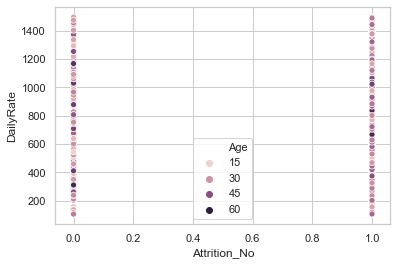

In [102]:



sns.scatterplot(hr_dummy["Attrition_No"],hr_dummy["DailyRate"], hue = hr_dummy ["Age"])

plt.show()

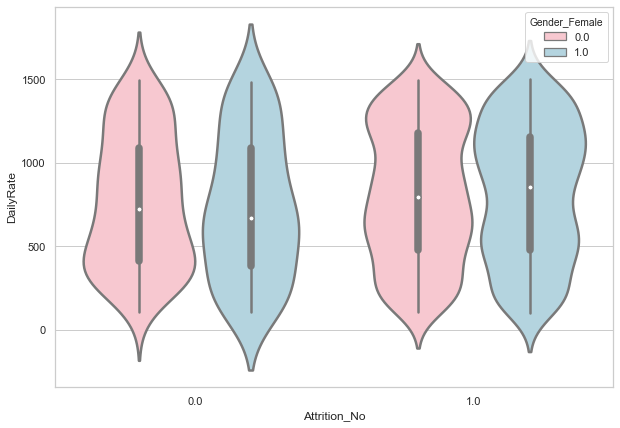

In [210]:
"""
lets explore some other data viz types 

that is already a bit more intersting, we see that the big belly in the blue 
graphs is lower than the one in the orange no graph, that could show a slight indication 
that people who left the company morelikely a lower sallary (irgnoring how 
many people we have in the two categories)
"""

figure = sns.violinplot(hr_dummy["Attrition_No"],hr_dummy["DailyRate"], palette= ["pink", "lightblue"], hue = hr_dummy ["Gender_Female"])
figure.figure.set_size_inches (10,7)
plt.show()

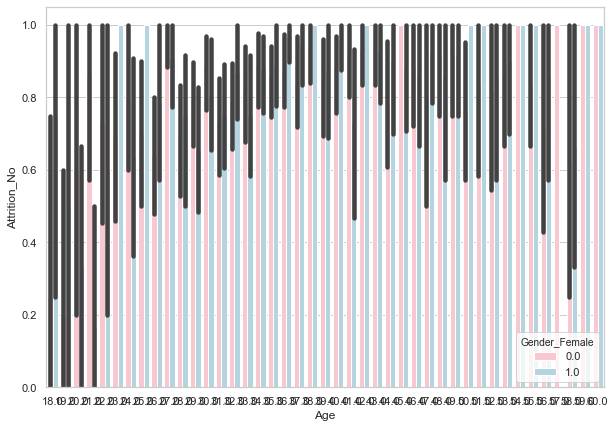

In [237]:
"""The same with a bar plot and truncated axis"""
bins= [np.arange(15,65,step=10)]

figure = sns.barplot(hr_dummy["Age"],hr_dummy["Attrition_No"], palette= ["pink", "lightblue"], hue = hr_dummy ["Gender_Female"])
figure.figure.set_size_inches (10,7)
plt.show()

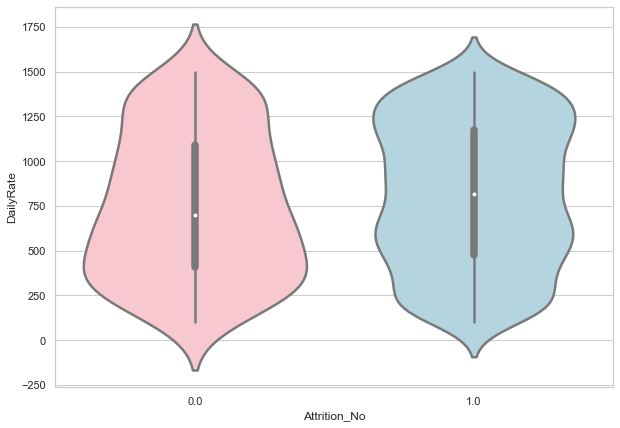

In [211]:
"""
lets explore some other data viz types 

that is already a bit more intersting, we see that the big belly in the blue 
graphs is lower than the one in the orange no graph, that could show a slight indication 
that people who left the company morelikely a lower sallary (irgnoring how 
many people we have in the two categories)
"""

figure = sns.violinplot(hr_dummy["Attrition_No"],hr_dummy["DailyRate"], palette= ["pink", "lightblue"])
figure.figure.set_size_inches (10,7)
plt.show()

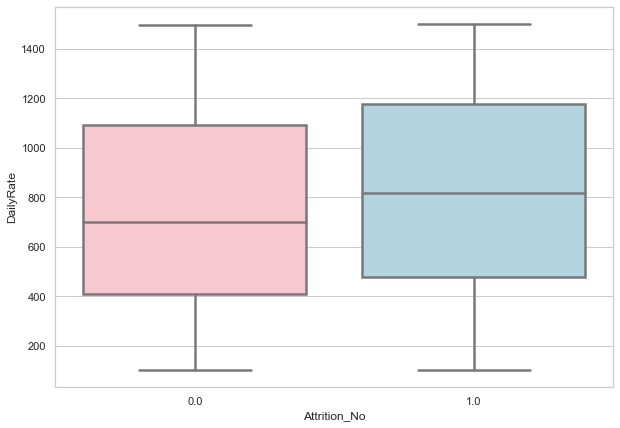

In [212]:
"""
An extremly related (less intuiteve but more intersting for statistical evaluations)
chart is the boxplot 
we clearly see here: the median daily rate of a person who left (attriton: yes) is lower 
than for a person who stayed 

further: we see that the spread of the two distributions is very similair
so wie have people erarning a lot and a litte per day in both categories 
"""

figure = sns.boxplot(hr_dummy["Attrition_No"],hr_dummy["DailyRate"], palette= ["pink", "lightblue"])
figure.figure.set_size_inches (10,7)
plt.show()

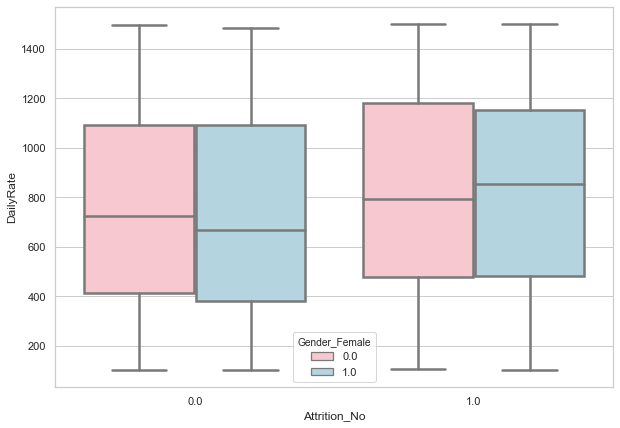

In [230]:
"""
An extremly related (less intuiteve but more intersting for statistical evaluations)
chart is the boxplot 
we clearly see here: the median daily rate of a person who left (attriton: yes) is lower 
than for a person who stayed 

further: we see that the spread of the two distributions is very similair
so wie have people erarning a lot and a litte per day in both categories 
"""

figure = sns.boxplot(hr_dummy["Attrition_No"],hr_dummy["DailyRate"], palette= ["pink", "lightblue"], hue =hr_dummy ["Gender_Female"])
figure.figure.set_size_inches (10,7)
plt.show()

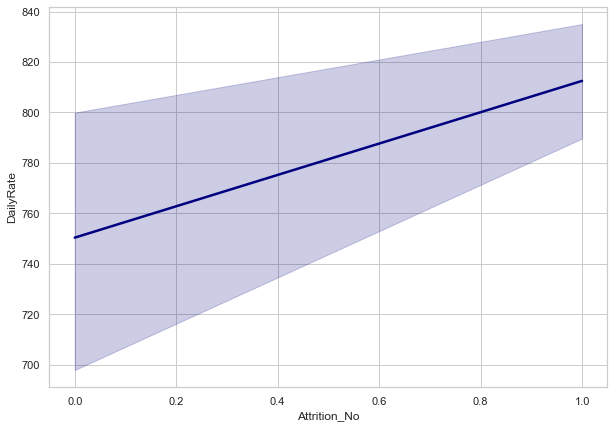

In [213]:
"""
that looks intersting, however, there is a huge catch! 
this graph by default is basically misleading and should not be used 
the y axis is only from 680-ish to 840-ish and ignores the values below
I show you how to change the axis and we see the a more similar picture 
than we have seen before ...
"""

figure = sns.lineplot(x = hr_dummy["Attrition_No"],y = hr_dummy["DailyRate"], color = "navy")
figure.figure.set_size_inches (10,7)
plt.show()

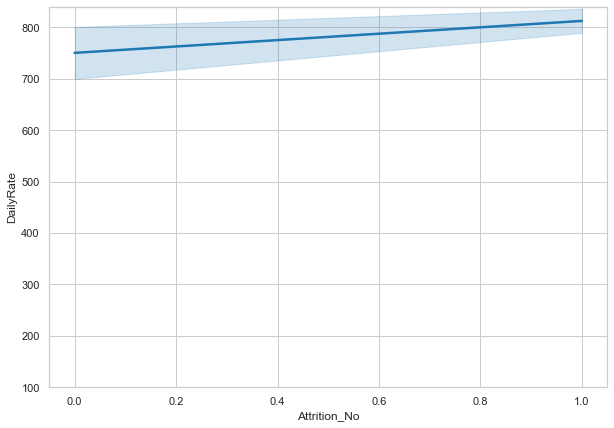

In [214]:
"""
lets change the y axis range to get a more realistic picture 
    we do that with matplotlib.pyplot that we have installed as plt

if we are already playing around with the graph lets change the style! 

intersting: the differnece does not seem to huge anymore

why have I set the min y-value to 100: because we know from our statistic 
    summery that the min daily rate is 102
    
    
BUUTTT: we can make the graph een better 
"""

plt.ylim(100, 840)
sns.set_style("whitegrid")
figure = sns.lineplot(x = hr_dummy["Attrition_No"],y = hr_dummy["DailyRate"])
figure.figure.set_size_inches (10,7)
plt.show()


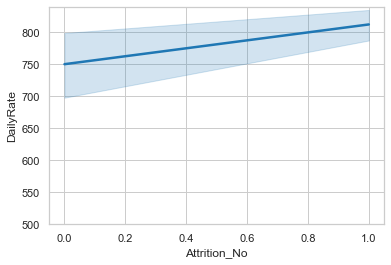

In [72]:
#we take a value (500 between the min daily rate and the python suggested one )

plt.ylim(500, 840)
sns.set_style("whitegrid")
sns.lineplot(x = hr_dummy["Attrition_No"],y = hr_dummy["DailyRate"])

plt.show()

please not we can also make histgrams with pure python, but I tell you, they are ot very handy to analyze and offer less options, and also why not using the great libaries that are out there



## Matplotlib.pyplot and Pandas 

-->> so going to the next one: Matpotlib and Pandas (my favorits, you will see why) 

"""
the first and formost cool thing about pandas is that you can read from loootts
of different data sources (e.g. excel, internet sources, csv (comma - 
sepperated values ....))

the you ether build an DataFrame (we have done that) if you have 2 dimensional 
data or you create a series 
"""


# OLS summary with statsmodels.api as sm
with several explanatory variables 

In [73]:
#get insides to the regession line 


"""confidence interval by default 95%


#note: that does not work ! the reason for that is: 
we need to define the variables prior to calling them for the summary statistics 



we are now including more and more varibales and see that the R^2 increases 
"""

import statsmodels.api as sm 

x = hr_dummy[["DailyRate", "Age", "DailyRate", "DistanceFromHome", "Education", "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear","WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Gender_Female", "JobRole_Healthcare Representative", "JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", "JobRole_Manufacturing Director", "JobRole_Research Director", "JobRole_Research Scientist", "JobRole_Sales Executive", "JobRole_Sales Representative", "BusinessTravel_Non-Travel", "BusinessTravel_Travel_Frequently", "BusinessTravel_Travel_Rarely", "Department_Human Resources", "Department_Sales", "Department_Research & Development", "OverTime_No", "Over18_Y","MaritalStatus_Single", "MaritalStatus_Married", "MaritalStatus_Divorced" ]]
y = hr_dummy["Attrition_No"]


X = sm.add_constant(x)
model = sm.OLS(y, X)
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Attrition_No   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     12.20
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           1.51e-64
Time:                        09:43:57   Log-Likelihood:                -404.19
No. Observations:                1470   AIC:                             888.4
Df Residuals:                    1430   BIC:                             1100.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
DailyR

# OLS with all Xns

In [87]:

"""
I got an error here and therefore, had to convert my int8 and int64
    to floats 
 
"""
hr_dummy = hr_dummy.astype (float)


x = np.column_stack ([hr_dummy.iloc [:,1:]])

y = hr_dummy["Attrition_No"]

X = sm.add_constant(x, prepend = True)
model = sm.OLS(y, X).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Attrition_No   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     12.20
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           1.51e-64
Time:                        09:50:23   Log-Likelihood:                -404.19
No. Observations:                1470   AIC:                             888.4
Df Residuals:                    1430   BIC:                             1100.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
DailyR

In [216]:


x = hr_dummy[["DailyRate", "Age"]]
y = hr_dummy["Attrition_No"]


X = sm.add_constant(x)
model = sm.OLS(y, X)
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Attrition_No   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     21.41
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           6.81e-10
Time:                        11:37:45   Log-Likelihood:                -594.12
No. Observations:                1470   AIC:                             1194.
Df Residuals:                    1467   BIC:                             1210.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5627      0.044     12.933      0.0

Note: we are speaking about a binary variable and therefore a classifier is much prefered (to a linear regression)

## (corelation)  heatmap


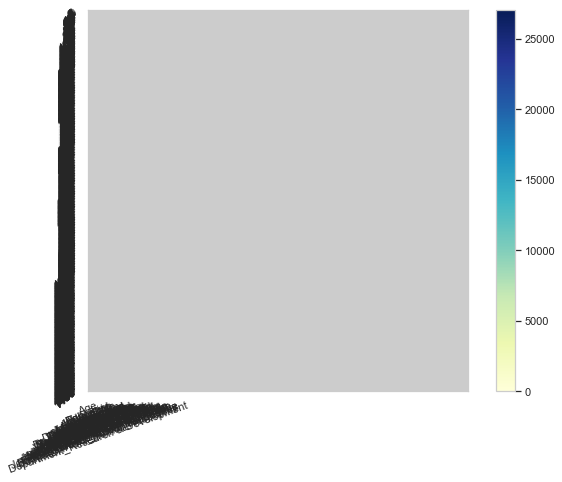

In [215]:
"""
below I just demonstrate, that is makes no sence to include everything in a 
heatmap if one has so many attributes
"""



figure = plt.imshow(hr_dummy, cmap = "YlGnBu")
figure.figure.set_size_inches (10,7)
plt.colorbar()
plt.xticks(range(len(hr_dummy)), hr_dummy.columns, rotation = 20)
plt.yticks(range(len(hr_dummy)), hr_dummy.index, rotation = 40)
plt.show()

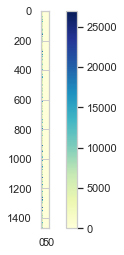

In [99]:
"""
we are picking some variables to demonstarte the corrlation between them 
as we have different values that have a different influence 
    the heatmap does not give much insides

"""


plt.imshow(hr_dummy, cmap = "YlGnBu")
plt.colorbar()

plt.show()